<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week10_SupplimentaryNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train A Digit Identifier That Works on Our Own Inputs

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.9.2


In [2]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Turn the images from grayscale to black-and-white
x_train_bw = (x_train > 0).astype(int)

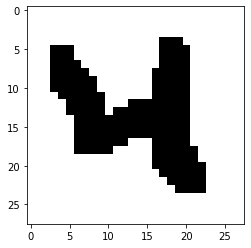

In [4]:
plt.imshow(x_train_bw[20, :, :], cmap="Greys")

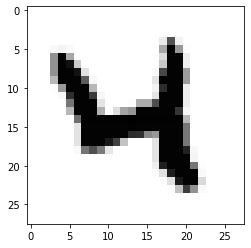

In [5]:
# The original image is in greyscale
plt.imshow(x_train[20, :, :], cmap="Greys")

In [6]:
# Train a neural network on the bw dataset
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

In [7]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 5ms/step - loss: 0.6987 - accuracy: 0.8141 - val_loss: 0.2868 - val_accuracy: 0.9192
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3147 - accuracy: 0.9091 - val_loss: 0.2357 - val_accuracy: 0.9310
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2611 - accuracy: 0.9244 - val_loss: 0.2012 - val_accuracy: 0.9420
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2255 - accuracy: 0.9351 - val_loss: 0.1824 - val_accuracy: 0.9487
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9428 - val_loss: 0.1557 - val_accuracy: 0.9578
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1772 - accuracy: 0.9486 - val_loss: 0.1424 - val_accuracy: 0.9617
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1597 - accuracy: 0.9538 - val_loss: 0.1300 - val_accuracy

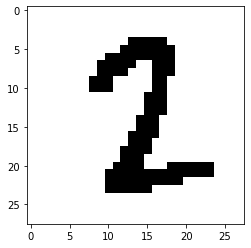

In [21]:
# Let convert the test data to black-and-white and evaluate the model's performance.
x_test_bw = (x_test > 0).astype(int)
plt.imshow(x_test_bw[456, :, :], cmap="Greys")

In [11]:
model.evaluate(x_test_bw, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9501


[0.17719613015651703, 0.9501000046730042]

In [28]:
# Test the model with our own images
import PIL
from PIL import ImageOps
img = PIL.Image.open("NewTest04.png")
img = img.convert('1') # Convert to black-and-white
print(img.size)

(28, 28)


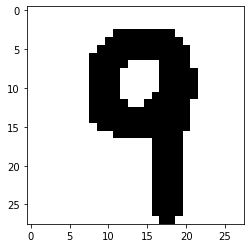

In [29]:
# Convert the image to the proper format
ary = np.array(img).astype(int)
ary = 1 - ary # We need to switch 0 and 1
plt.imshow(ary, cmap="Greys") 

In [30]:
model.predict(ary.reshape(1, 28, 28))

1/1 [==============================] - 0s 18ms/step


array([[0.   , 0.   , 0.   , 0.183, 0.001, 0.   , 0.   , 0.   , 0.522,
        0.295]], dtype=float32)

# A Super Simple Neural Networks That Represents the XOR Function
The XOR (exclusive-or) function works as follows:
- XOR(0, 0) = XOR(1, 1) = 0
- XOR(0, 1) = XOR(1, 0) = 1

In [45]:
xor = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2)),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.sigmoid), # sigmoid represents the logistic function
    tf.keras.layers.Dense(2, activation="softmax")
])

In [46]:
# tf.keras.activations.sigmoid([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0]).numpy()

In [54]:
xor.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [55]:
xor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 2)                 8         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [56]:
import pandas as pd
xor_data = pd.DataFrame({
    "x1":[0, 0, 1, 1],
    "x2":[0, 1, 0, 1],
    "Output":[0, 1, 1, 0]
})

xor_data

,x1,x2,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [57]:
xor.fit(xor_data[['x1', 'x2']], xor_data['Output'], epochs=1000) # Adjust the number of epochs until the accuracy becomes 1.0

Epoch 1/1000
1/1 [==============================] - 0s 286ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 11/1000


In [69]:
# Extract the parameters
layer1_weights, layer1_biases = xor.layers[0].weights
layer1_weights = layer1_weights.numpy()
layer1_biases = layer1_biases.numpy()
print("Layer 1 weights:\n", layer1_weights)
print("Layer 1 biases:\n", layer1_biases)

layer2_weights, layer2_biases = xor.layers[1].weights
layer2_weights = layer2_weights.numpy()
layer2_biases = layer2_biases.numpy()
print("Layer 2 weights:\n", layer2_weights)
print("Layer 2 biases:\n", layer2_biases)

Layer 1 weights:
 [[ 2.256 -1.75   1.442]
 [ 1.61  -2.249  1.449]]
Layer 1 biases:
 [ 0.243 -0.125 -1.836]
Layer 2 weights:
 [[-1.802  2.053]
 [ 2.307 -1.063]
 [ 1.644 -1.995]]
Layer 2 biases:
 [ 0.55 -0.55]


## Let's verify the output for input (0, 1)

### Input Layer: [0, 1]

### Hidden Layer:

In [71]:
# Hidden Layer (Calculated separately)

# Define the logistic function t = 1 / (1 + e^(-t))
def sigma(t):
    return 1 / (1 + np.exp(-t))

h1 = sigma(0 * 2.256 + 1 * 1.61 + 0.243)
h2 = sigma(0 * (-1.75) + 1 * (-2.249) + (-0.125))
h3 = sigma(0 * 1.442 + 1 * 1.449 + (-1.836))
print(h1, h2, h3)

0.8644789527315407 0.08517693451450639 0.40443969774987565


In [73]:
# It can also be calculated through matrix computation
# Because there are faster algorithms for matrix computation, this takes less time than above
I = np.array([[0, 1]])
H = sigma(I.dot(layer1_weights) + layer1_biases)
print(H)

[[0.865 0.085 0.404]]


## Output Layer

In [79]:
# Output Layer

probs = tf.nn.softmax(np.array([
    h1 * (-1.802) + h2 * 2.307 + h3 * 1.644 + (0.55),
    h1 * 2.053 + h2 * (-1.063) + h3 * (-1.995) + (-0.55)
])).numpy()

In [80]:
# Prediction:
np.argmax(probs)

1